# **TITANIC SURVIVAL PREDICTION**

# Importing Libraries:






In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#Loading Dataset:

In [46]:
data = pd.read_csv('/content/drive/MyDrive/Titanic.csv')

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [49]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [50]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Preprocessing:

In [51]:
data.fillna(method='ffill', inplace=True)

In [52]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
data = data.drop(['Name', 'Cabin'], axis=1)

# Label Encoder:

In [54]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [55]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,1,34.5,0,0,330911,7.8292,1
1,893,1,3,0,47.0,1,0,363272,7.0000,2
2,894,0,2,1,62.0,0,0,240276,9.6875,1
3,895,0,3,1,27.0,0,0,315154,8.6625,2
4,896,1,3,0,22.0,1,1,3101298,12.2875,2


In [56]:
data['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64>

# Identifying and Removing Null Values:

In [57]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [58]:
data.shape

(418, 10)

# Feature Selection:

In [59]:
features = ['Age', 'Pclass', 'Fare']
X = data[features]
y = data['Survived']

In [60]:
data_sur = data[data['Survived'] == 1]

In [61]:
data_sur.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,893,1,3,0,47.0,1,0,363272,7.0000,2
4,896,1,3,0,22.0,1,1,3101298,12.2875,2
6,898,1,3,0,30.0,0,0,330972,7.6292,1
8,900,1,3,0,18.0,0,0,2657,7.2292,0
12,904,1,1,0,23.0,1,0,21228,82.2667,2


#Data Visualization:

#Number of people survived grouped by Pclass:

In [62]:
pclass_Survived = pd.DataFrame(data['Pclass'].value_counts()).reset_index()
pclass_Survived.columns = ['Class', 'Count']
pclass_Survived

,Class,Count
0,3,218
1,1,107
2,2,93


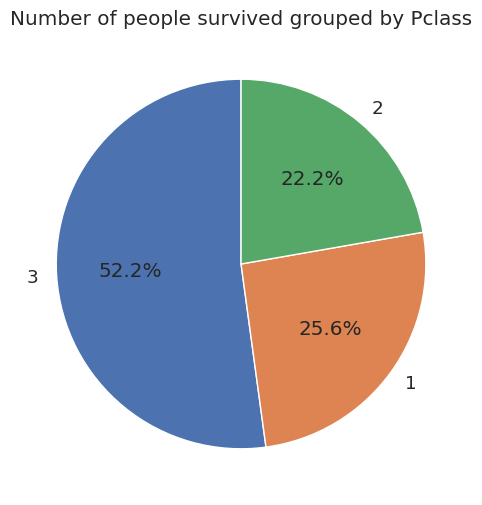

In [63]:
plt.figure(figsize=(6,6))
plt.pie(pclass_Survived['Count'], labels=pclass_Survived['Class'], autopct = '%1.1f%%', startangle = 90)
plt.title("Number of people survived grouped by Pclass")
plt.show()

# Number of people survived grouped by Sex:

In [64]:
sex_survived = pd.DataFrame(data['Sex'].value_counts()).reset_index()
sex_survived.columns = ['Sex', 'Count']
sex_survived

,Sex,Count
0,1,266
1,0,152


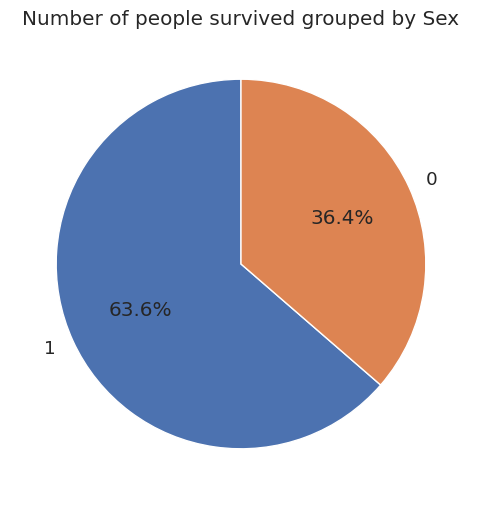

In [65]:
plt.figure(figsize=(6,6))
plt.pie(sex_survived['Count'], labels=sex_survived['Sex'], autopct = '%1.1f%%', startangle = 90)
plt.title("Number of people survived grouped by Sex")
plt.show()

# Number of people survived grouped by Age:


In [66]:
age_survived = pd.DataFrame(data['Age'].value_counts()).reset_index()
age_survived.columns = ['Category', 'Count']
age_survived

,Category,Count
0,21.0,21
1,24.0,21
2,22.0,21
3,30.0,20
4,18.0,17
...,...,...
74,76.0,1
75,28.5,1
76,22.5,1
77,62.0,1


# Number of people survived grouped by SibSp:

In [67]:
sibsp_survived = pd.DataFrame(data['SibSp'].value_counts()).reset_index()
sibsp_survived.columns = ['SibSp', 'Count']
sibsp_survived

,SibSp,Count
0,0,283
1,1,110
2,2,14
3,3,4
4,4,4
5,8,2
6,5,1


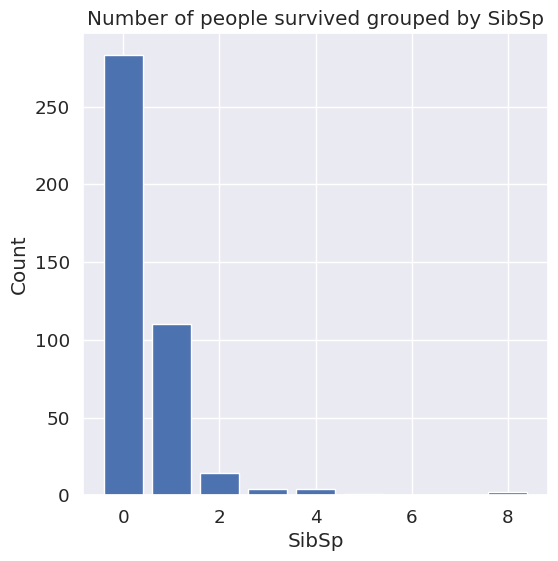

In [68]:
plt.figure(figsize=(6,6))
plt.bar(sibsp_survived['SibSp'],sibsp_survived['Count'])
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title("Number of people survived grouped by SibSp")
plt.show()

# Number of people survived grouped by Parch:


In [69]:
parch_survived = pd.DataFrame(data['Parch'].value_counts()).reset_index()
parch_survived.columns = ['Class', 'Count']
parch_survived

,Class,Count
0,0,324
1,1,52
2,2,33
3,3,3
4,4,2
5,9,2
6,6,1
7,5,1


# Number of people survived grouped by Ticket:


In [70]:
ticket_survived = pd.DataFrame(data['Ticket'].value_counts()).reset_index()
ticket_survived.columns = ['Ticket', 'Count']
ticket_survived

,Ticket,Count
0,PC 17608,5
1,CA. 2343,4
2,113503,4
3,PC 17483,3
4,220845,3
...,...,...
358,349226,1
359,2621,1
360,4133,1
361,113780,1


# Number of people survived grouped by Fare:

In [71]:
fare_survived = pd.DataFrame(data['Fare'].value_counts()).reset_index()
fare_survived.columns = ['Fare', 'Count']
fare_survived

,Fare,Count
0,7.7500,21
1,26.0000,19
2,13.0000,17
3,8.0500,17
4,7.8958,12
...,...,...
164,7.8208,1
165,8.5167,1
166,78.8500,1
167,52.0000,1


# Number of people survived grouped by Embarked:

In [72]:
embarked_survived = pd.DataFrame(data['Embarked'].value_counts()).reset_index()
embarked_survived.columns = ['Embarked', 'Count']
embarked_survived

,Embarked,Count
0,2,270
1,0,102
2,1,46


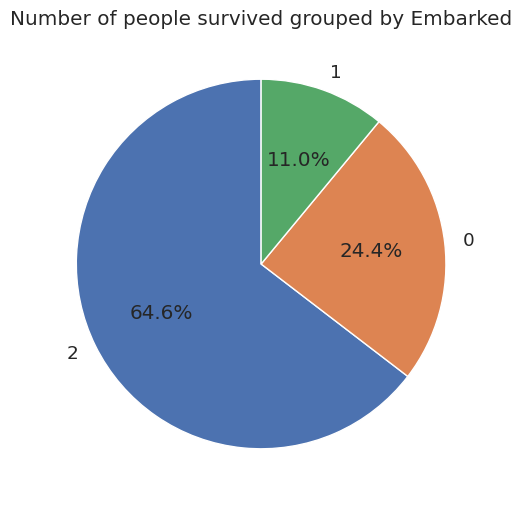

In [73]:
plt.figure(figsize=(6,6))
plt.pie(embarked_survived['Count'], labels=embarked_survived['Embarked'], autopct = '%1.1f%%', startangle = 90)
plt.title("Number of people survived grouped by Embarked")
plt.show()

#Train Test Split:

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#Building, Training and Evaluating the Model:

In [75]:
model = SVC(kernel='linear', C=1)

In [76]:
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [77]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.66


In [78]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [79]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


# Among the above two mode we choose RandomForest as it has better accuracy

In [81]:
y_pred = model.predict(X_test)

# Classification Report:

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        85
           1       0.51      0.54      0.52        41

    accuracy                           0.68       126
   macro avg       0.64      0.64      0.64       126
weighted avg       0.69      0.68      0.68       126



#Evaluation Metrics:

In [83]:
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.52


In [84]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.54


In [85]:
precision = precision_score(y_test,y_pred)
print(f'Precision: {precision:.2f}')

Precision: 0.51


In [86]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[64 21]
 [19 22]]


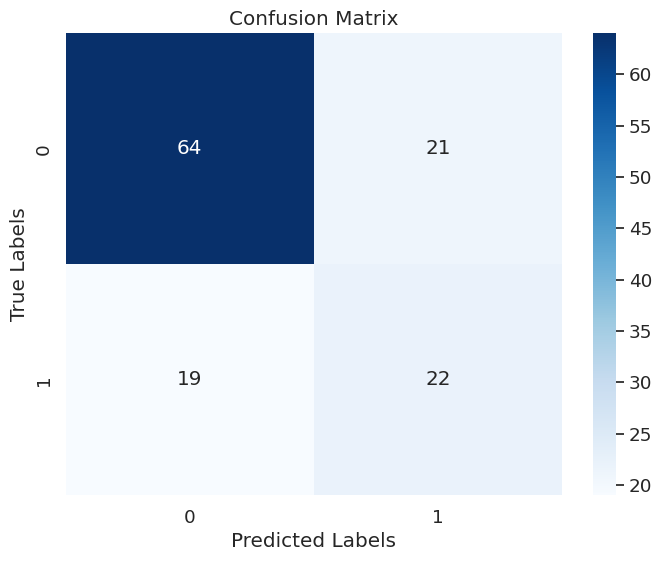

In [87]:
plt.figure(figsize=(8,6))
sns.set(font_scale = 1.2)
sns.heatmap(confusion, annot = True, fmt = 'd',cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#Making Predictions:


In [88]:
new_passenger = pd.DataFrame({'Age': [30], 'Pclass': [1], 'Fare': [100]})
prediction = model.predict(new_passenger)
print(f'Predicted Survival: {prediction[0]}')

Predicted Survival: 1
